In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/colab/heart_v2.csv', index_col=0)

In [4]:
df.head()

,sex,BP,cholestrol,heart disease
age,,,,
70,1,130,322,1
67,0,115,564,0
57,1,124,261,1
64,1,128,263,0
74,0,120,269,0


In [5]:
df.reset_index(inplace=True)

In [6]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [7]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [8]:
df.shape

(270, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [10]:
df.corr()

,age,sex,BP,cholestrol,heart disease
age,1.000000,-0.094401,0.273053,0.220056,0.212322
sex,-0.094401,1.000000,-0.062693,-0.201647,0.297721
BP,0.273053,-0.062693,1.000000,0.173019,0.155383
cholestrol,0.220056,-0.201647,0.173019,1.000000,0.118021
heart disease,0.212322,0.297721,0.155383,0.118021,1.000000


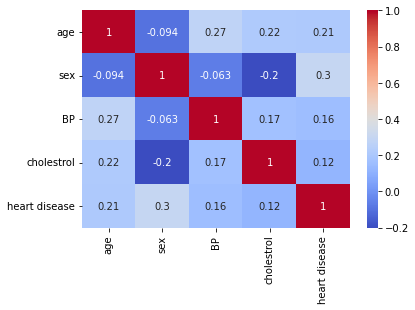

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


### Models

In [13]:
def set_target(df, target):
  X = df.drop(target, axis=1)
  Y = df[target]
  return X, Y

In [14]:
def get_train_test(X,Y,test_size):  
  x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=test_size, 
                                                    random_state=42,
                                                    stratify=Y)
  return x_train, x_test, y_train, y_test

In [15]:
def model_apply(model, xTrain, yTrain, xTest):
  model.fit(xTrain, yTrain)
  yHat = model.predict(xTest)
  return yHat

In [60]:
def evaluate_model(yReal, yHat, model=None):
  acuracia = accuracy_score(yReal, yHat)
  precisao = precision_score(yReal, yHat)
  recall = recall_score(yReal, yHat)
  print('Accuracy: ', acuracia * 100) 
  print('Precision: ', precisao * 100) 
  print('Recall: ', recall * 100)
  print('---------------------\n') 

  cmf = confusion_matrix(yReal, yHat)
  sns.heatmap(pd.DataFrame(cmf), annot=True, fmt='g')
  plt.xlabel('P R E D I C T')
  plt.ylabel('R E A L')
  plt.show()

  print(classification_report(yReal, yHat))
  
  if type(model) == DecisionTreeClassifier:
    tree_graph(model, X.columns)

In [58]:
tree = DecisionTreeClassifier()

In [17]:
def tree_graph(model, features):
  plt.figure(figsize=(25,20))
  _ = plot_tree(model, 
            feature_names=features,
            class_names=['Saudavel', 'Doente'],
            filled = True)

In [18]:
def pipeline(model, df, target):
  X, Y = set_target(df, target)
  x_train, x_test, y_train, y_test = get_train_test(X, Y, 0.3)
  y_hat = model_apply(model, x_train, y_train, x_test)
  evaluate_model(y_test, y_hat)

In [19]:
model = DummyClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  55.55555555555556
Precision:  0.0
Recall:  0.0
---------------------



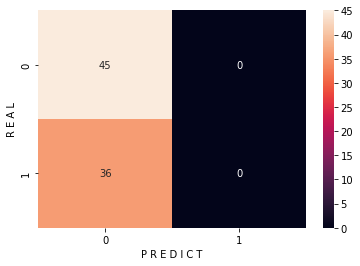

In [20]:
pipeline(model, df, 'heart disease')

In [21]:
X, Y = set_target(df, 'heart disease')

In [22]:
x_train, x_test, y_train, y_test = get_train_test(X, Y, 0.3)

In [23]:
model = DecisionTreeClassifier(max_depth=3)
y_hat = model_apply(model, x_train, y_train, x_test)

Accuracy:  70.37037037037037
Precision:  66.66666666666666
Recall:  66.66666666666666
---------------------



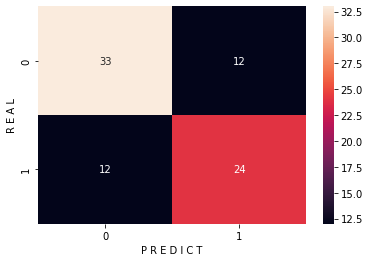

In [24]:
evaluate_model(y_test, y_hat)

Accuracy:  60.49382716049383
Precision:  55.55555555555556
Recall:  55.55555555555556
---------------------



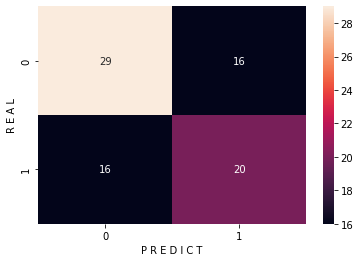

In [25]:
model = DecisionTreeClassifier(min_samples_split=10)
y_hat = model_apply(model, x_train, y_train, x_test)
evaluate_model(y_test, y_hat)

Accuracy:  60.49382716049383
Precision:  54.347826086956516
Recall:  69.44444444444444
---------------------



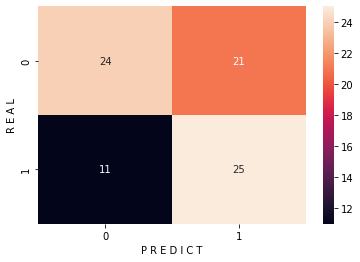

In [26]:
model = DecisionTreeClassifier(min_samples_leaf=10)
y_hat = model_apply(model, x_train, y_train, x_test)
evaluate_model(y_test, y_hat)

Accuracy:  56.79012345679012
Precision:  51.162790697674424
Recall:  61.111111111111114
---------------------



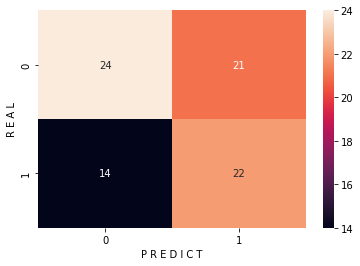

In [27]:
model = DecisionTreeClassifier(min_samples_leaf=10, criterion='entropy')
y_hat = model_apply(model, x_train, y_train, x_test)
evaluate_model(y_test, y_hat)

In [28]:
model_tree = DecisionTreeClassifier(random_state=42)

In [29]:
np.arange(1, 21)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [30]:
params = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': [50, 60, 80], 
    'min_samples_leaf': [10, 20, 30, 40],
    'criterion': ['gini', 'entropy']
}

In [31]:
grid_search = GridSearchCV(estimator=model_tree,
                          param_grid=params,
                          cv=10,
                          scoring='accuracy',
                          verbose=1)

In [32]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_leaf': [10, 20, 30, 40],
                         'min_samples_split': [50, 60, 80]},
             scoring='accuracy', verbose=1)

In [33]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=30,
                       min_samples_split=50, random_state=42)

In [34]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 30,
 'min_samples_split': 50}

In [35]:
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=3,
                               min_samples_leaf=30,
                               min_samples_split=50)

In [36]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=30,
                       min_samples_split=50)

In [37]:
model_best = grid_search.best_estimator_

In [38]:
model_best

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=30,
                       min_samples_split=50, random_state=42)

Accuracy:  60.49382716049383
Precision:  54.347826086956516
Recall:  69.44444444444444
---------------------



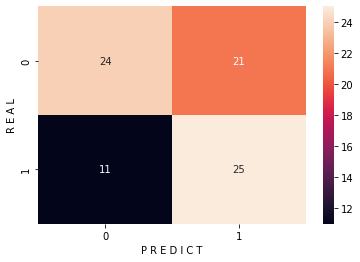

              precision    recall  f1-score   support

           0       0.69      0.53      0.60        45
           1       0.54      0.69      0.61        36

    accuracy                           0.60        81
   macro avg       0.61      0.61      0.60        81
weighted avg       0.62      0.60      0.60        81



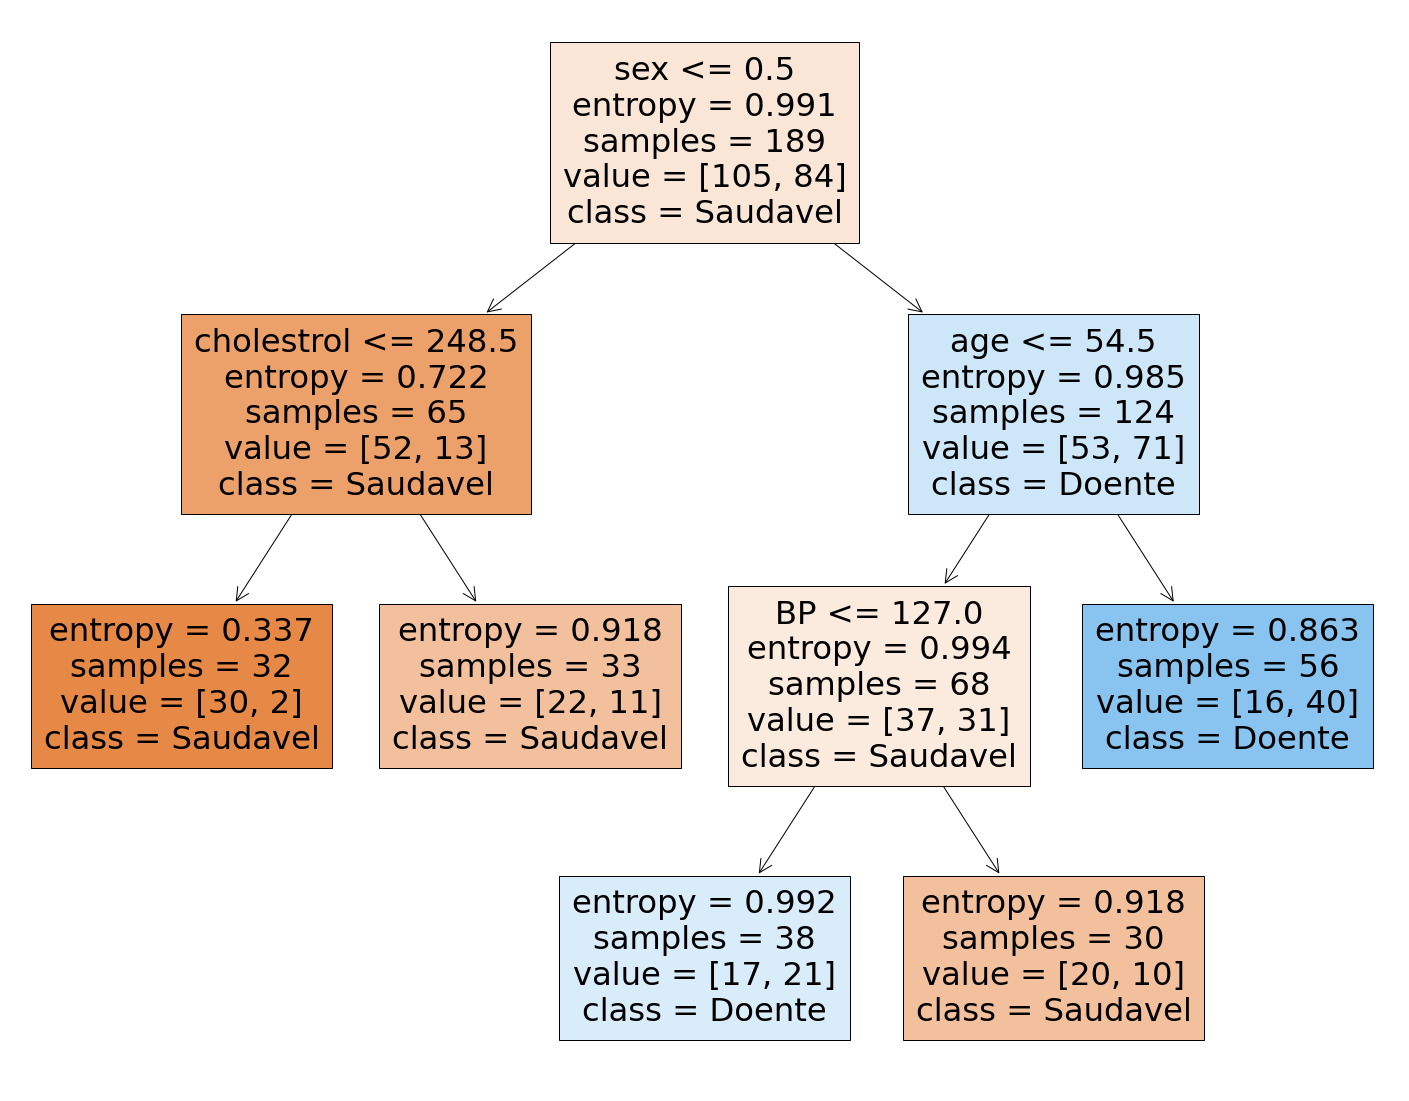

In [50]:
y_hat = model_apply(model_best, x_train, y_train, x_test)
evaluate_model(y_test, y_hat, model_best)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_clf = RandomForestClassifier(n_estimators=10, 
                                criterion='entropy',
                                max_depth=3, 
                                min_samples_leaf=30,
                                min_samples_split=50)

Accuracy:  69.1358024691358
Precision:  66.66666666666666
Recall:  61.111111111111114
---------------------



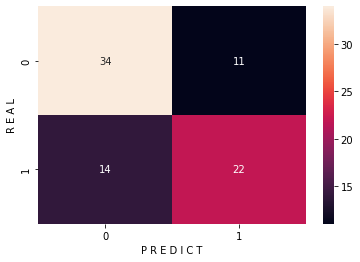

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        45
           1       0.67      0.61      0.64        36

    accuracy                           0.69        81
   macro avg       0.69      0.68      0.68        81
weighted avg       0.69      0.69      0.69        81



In [63]:
y_hat = model_apply(rf_clf, x_train, y_train, x_test)
evaluate_model(y_test, y_hat, rf_clf)

In [64]:
rf_clf.feature_importances_

array([0.44440146, 0.34243214, 0.03746103, 0.17570537])

In [68]:
importance_df = pd.DataFrame(
    {'features': list(X.columns), 'importance': rf_clf.feature_importances_}
).sort_values('importance', ascending=False)

In [75]:
importance_df

,features,importance
0,age,0.444401
1,sex,0.342432
3,cholestrol,0.175705
2,BP,0.037461


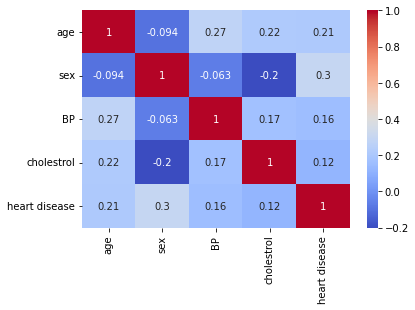

In [72]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

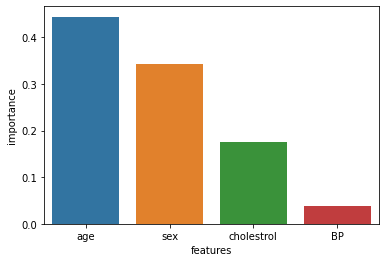

In [73]:
sns.barplot(x=importance_df['features'], y=importance_df['importance'])